# 一、Pandas 统计分析基础

## 1.读取查看P2P网贷数据主表基本信息

In [ ]:
import pandas as pd
master = pd.read_csv("Training_Master.csv",encoding='gbk')

### （1）使用ndim、shape、memory_usage属性分别查看维度、大小、占用内存

In [ ]:
print("Data frame 's dimensions:",master.ndim)
print("Data frame 's shape:",master.shape)
print("Data frame 's memory_usage:",master.memory_usage)

### （2）使用describe方法进行描述性统计，剔除值相同或全空的列

In [ ]:
def dropNullStd(data):
    beforelen = data.shape[1]
    colisNull = data.describe().loc['count']==0 #计数为0，即空列
    for i in range(len(colisNull)):
        if colisNull[i]:
            data.drop((colisNull).index[i],axis=1,inplace=True)
    stdisZero = data.describe().loc['std'] == 0 #标准差同，值相同
    for i in range(len(stdisZero)):
        if stdisZero[i]:
            data.drop(stdisZero.index[i],axis=1,inplace=True)
    afterlen = data.shape[1]
    print('Deleted:',beforelen-afterlen)
    print('Shape after change:',data.shape)
dropNullStd(master)
master.describe()

### Whole

In [ ]:
import pandas as pd
master = pd.read_csv("Training_Master.csv",encoding='gbk')

def dropNullStd(data):
    beforelen = data.shape[1]
    colisNull = data.describe().loc['count']==0 #计数为0，即空列
    for i in range(len(colisNull)):
        if colisNull[i]:
            data.drop((colisNull).index[i],axis=1,inplace=True)
    stdisZero = data.describe().loc['std'] == 0 #标准差同，值相同
    for i in range(len(stdisZero)):
        if stdisZero[i]:
            data.drop(stdisZero.index[i],axis=1,inplace=True)
    afterlen = data.shape[1]
    print('Deleted:',beforelen-afterlen)
    print('Shape after change:',data.shape)

print("Data frame 's dimensions:",master.ndim)
print("Data frame 's shape:",master.shape)
print("Data frame 's memory_usage:",master.memory_usage)
dropNullStd(master)
master.describe()


## 2.提取用户信息更新表与登录信息表的时间信息

### （1）使用to_datetime函数转换用户信息更新表、登录信息表的时间字符串

In [3]:
import pandas as pd
update = pd.read_csv("Training_Userupdate.csv")
login = pd.read_csv("Training_LogInfo.csv")

### （2）使用year、month、week 等方法提取两个表中的时间信息

In [28]:
'''
# Method 1:use DateIndex,but seems the result can not be calculalted.

dateIndex_update_listing = pd.DatetimeIndex(update['ListingInfo1'])
dateIndex_update_user = pd.DatetimeIndex(update['UserupdateInfo2'])


dateIndex_login_listing = pd.DatetimeIndex(login['ListingInfo1'])
dateIndex_login_user = pd.DatetimeIndex(login['LogInfo3'])

year_update_listing = dateIndex_update_listing.year
month_update_listing = dateIndex_update_listing.month
day_update_listing = dateIndex_update_listing.day
week_update_listing = dateIndex_update_listing.week

year_update_user = dateIndex_update_user.year
month_update_user = dateIndex_update_user.month
day_update_user = dateIndex_update_user.day
week_update_user = dateIndex_update_user.week

year_login_listing = dateIndex_login_listing.year
month_login_listing = dateIndex_login_listing.month
day_login_listing = dateIndex_login_listing.day
week_login_listing = dateIndex_login_listing.week

year_login_user = dateIndex_login_user.year
month_login_user = dateIndex_login_user.month
day_login_user = dateIndex_login_user.day
week_login_user = dateIndex_login_user.week



'''
print(login.dtypes)
# Method 2:transform data type of the column
update['ListingInfo1'] = pd.to_datetime(update['ListingInfo1'])
update['UserupdateInfo2'] = pd.to_datetime(update['UserupdateInfo2'])

login['Listinginfo1'] = pd.to_datetime(login['Listinginfo1'])
login['LogInfo3'] = pd.to_datetime(login['LogInfo3'])


year_update_listing = [i.year for i in update['ListingInfo1']]
month_update_listing = [i.month for i in update['ListingInfo1']]
day_update_listing = [i.day for i in update['ListingInfo1']]
week_update_listing = [i.week for i in update['ListingInfo1']]

year_update_user = [j.year for j in update['UserupdateInfo2']]
month_update_user = [j.month for j in update['UserupdateInfo2']]
day_update_user = [i.day for i in update['UserupdateInfo2']]
week_update_user = [j.week for j in update['UserupdateInfo2']]

year_login_listing = [k.year for k in login['Listinginfo1']]
month_login_listing = [k.month for k in login['Listinginfo1']]
day_login_listing = [k.day for k in login['Listinginfo1']]
week_login_listing = [k.week for k in login['Listinginfo1']]

year_login_user = [l.year for l in login['LogInfo3']]
month_login_user = [l.month for l in login['LogInfo3']]
day_login_user = [l.day for l in login['LogInfo3']]
week_login_user = [l.week for l in login['LogInfo3']]





Idx              int64
Listinginfo1    object
LogInfo1         int64
LogInfo2         int64
LogInfo3        object
dtype: object


### （3）计算两个表中两时间的差，分别以日、小时、分钟计算

In [5]:
update_delta = update['ListingInfo1'] -update['UserupdateInfo2']
login_delta = login['Listinginfo1']-login['LogInfo3']


print('day difference in update table:',[i.days for i in update_delta])
print('hour difference in update table:',[i.days*24 for i in update_delta])
print('minute difference in update table:',[i.days*24*60 for i in update_delta])





day difference in update table: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 250, 250, 250, 250, 250, 250, 233, 233, 233, 233, 250, 250, 6, 250, 250, 250, 250, 250, 250, 250, 250, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 42, 42, 35, 35, 35, 42, 42, 42, 42, 42, 42, 42, 0, 166, 166, 166, 166, 166, 2, 166, 166, 1, 166, 166, 166, 166, 2, 166, 7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 12, 12, 2, 12, 12, 2, 12, 12, 2, 12, 12, 12, 2, 12, 12, 12, 12, 12, 12, 2, 2, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 8, 6, 6, 8, 8, 7, 8, 8, 8, 8, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 4, 4, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 5, 4, 6, 5, 6, 6, 6, 6, 5, 5, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 19, 0, 6, 6

hour difference in update table: [312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 6000, 6000, 6000, 6000, 6000, 6000, 5592, 5592, 5592, 5592, 6000, 6000, 144, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 192, 192, 168, 192, 192, 192, 192, 192, 192, 192, 168, 168, 168, 168, 168, 168, 168, 168, 168, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 1008, 1008, 840, 840, 840, 1008, 1008, 1008, 1008, 1008, 1008, 1008, 0, 3984, 3984, 3984, 3984, 3984, 48, 3984, 3984, 24, 3984, 3984, 3984, 3984, 48, 3984, 168, 168, 168, 168, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 336, 336, 336, 336, 336, 336, 336, 336, 336, 336, 288, 288, 48, 288, 288, 48, 288, 288, 48, 288, 288, 288, 48, 288, 288, 288, 288, 288, 288, 48, 48, 168, 168, 168, 168, 144, 168, 168, 168, 168, 168, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 192, 1

minute difference in update table: [18720, 18720, 18720, 18720, 18720, 18720, 18720, 18720, 18720, 18720, 18720, 360000, 360000, 360000, 360000, 360000, 360000, 335520, 335520, 335520, 335520, 360000, 360000, 8640, 360000, 360000, 360000, 360000, 360000, 360000, 360000, 360000, 11520, 11520, 11520, 11520, 11520, 11520, 11520, 11520, 11520, 11520, 7200, 7200, 7200, 7200, 7200, 7200, 7200, 7200, 7200, 7200, 11520, 11520, 10080, 11520, 11520, 11520, 11520, 11520, 11520, 11520, 10080, 10080, 10080, 10080, 10080, 10080, 10080, 10080, 10080, 5760, 5760, 5760, 5760, 5760, 5760, 5760, 5760, 5760, 5760, 60480, 60480, 50400, 50400, 50400, 60480, 60480, 60480, 60480, 60480, 60480, 60480, 0, 239040, 239040, 239040, 239040, 239040, 2880, 239040, 239040, 1440, 239040, 239040, 239040, 239040, 2880, 239040, 10080, 10080, 10080, 10080, 7200, 7200, 7200, 7200, 7200, 7200, 7200, 7200, 7200, 7200, 7200, 7200, 7200, 20160, 20160, 20160, 20160, 20160, 20160, 20160, 20160, 20160, 20160, 17280, 17280, 2880, 1

## 3.使用分组聚合方法进一步分析用户信息更新表和登录信息表

In [24]:
import pandas as pd
import numpy as np
update = pd.read_csv("Training_Userupdate.csv")
login = pd.read_csv("Training_LogInfo.csv")

### （1）使用groupby方法对用户信息更新表、登录信息表分组

In [30]:
update_group = update.groupby(by='Idx')
login_group = login.groupby(by='Idx')


### （2）使用agg方法求取分组后的最早和最晚更新及登录时间

In [31]:
#先转换为日期，否则会被看作算术表达式
update['ListingInfo1'] = pd.to_datetime(update['ListingInfo1'])
update['UserupdateInfo2'] = pd.to_datetime(update['UserupdateInfo2'])

login['Listinginfo1'] = pd.to_datetime(login['Listinginfo1'])
login['LogInfo3'] = pd.to_datetime(login['LogInfo3'])


update_group_time = update_group[['ListingInfo1','UserupdateInfo2']].agg([np.min,np.max])
login_group_time = login_group[['Listinginfo1','LogInfo3']].agg([np.min,np.max])


### （3）使用size方法求取分组后的数据的信息更新次数，登录次数

In [33]:
update_times = update_group.size()
login_times = login_group.size()

### Whole:

## 4.对用户信息更新表、登录信息表进行长宽表转换

In [14]:
import pandas as pd
import numpy as np
update = pd.read_csv("Training_Userupdate.csv")
login = pd.read_csv("Training_LogInfo.csv")


['Idx', 'ListingInfo1', 'UserupdateInfo1', 'UserupdateInfo2']


### （1）使用pivot_table函数进行长宽表转换

In [22]:
import pandas as pd
import numpy as np
update = pd.read_csv("Training_Userupdate.csv")
login = pd.read_csv("Training_LogInfo.csv")
update_pivot = pd.pivot_table(update[['Idx','ListingInfo1','UserupdateInfo2']],index='Idx',aggfunc=np.min,margins=True)


### （2）使用crosstab方法进行长宽表转换

In [23]:
print(update_pivot)

      ListingInfo1 UserupdateInfo2
Idx                               
3       2013/11/05      2013/08/30
5       2013/11/07      2013/10/24
8       2013/11/06      2013/10/25
12      2013/11/01      2012/12/08
16      2013/11/05      2013/10/27
17      2013/11/05      2013/10/27
18      2013/11/01      2013/10/27
20      2013/11/01      2013/10/27
21      2013/11/01      2013/10/28
23      2013/11/01      2013/08/11
29      2013/11/01      2013/10/28
31      2013/11/05      2013/10/28
33      2013/11/01      2013/10/28
35      2013/11/05      2013/10/21
36      2013/11/01      2013/10/28
37      2013/11/01      2013/09/11
41      2013/11/07      2013/10/29
43      2013/11/04      2013/10/29
48      2013/11/09      2013/07/04
51      2013/11/05      2013/10/29
57      2013/11/01      2013/10/29
62      2013/11/05      2013/09/27
67      2013/11/07      2013/10/29
68      2013/11/01      2013/08/26
71      2013/11/04      2013/08/04
73      2013/11/01      2013/10/29
75      2013/11/05  

### Whole:

# 五、pandas数据预处理

## 1.插补用户用电量数据缺失值


### （1）读取missing_data.csv中的数据

In [44]:
import pandas as pd
import numpy as np
missing = pd.read_excel('missing_data.xls')

### （2）查询缺失值所在位置

In [77]:
print('The Na value lies on:',np.unique(missing[missing.isnull().values==True].index.tolist()))
missing[missing.isnull().values==True]
missing_c1_location = missing[missing.iloc[:,[0]].isnull().values==True].index.tolist()
missing_c2_location = missing[missing.iloc[:,[1]].isnull().values==True].index.tolist()
missing_c3_location = missing[missing.iloc[:,[2]].isnull().values==True].index.tolist()


The Na value lies on: [ 2  3  4  6  9 11 15 18 19]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

### （3）使用SciPy的interpolate模块的lagrange对数据进行拉格朗日插值，不存在缺失值说明成功

In [ ]:
from scipy.interpolate import lagrange


### Whole:

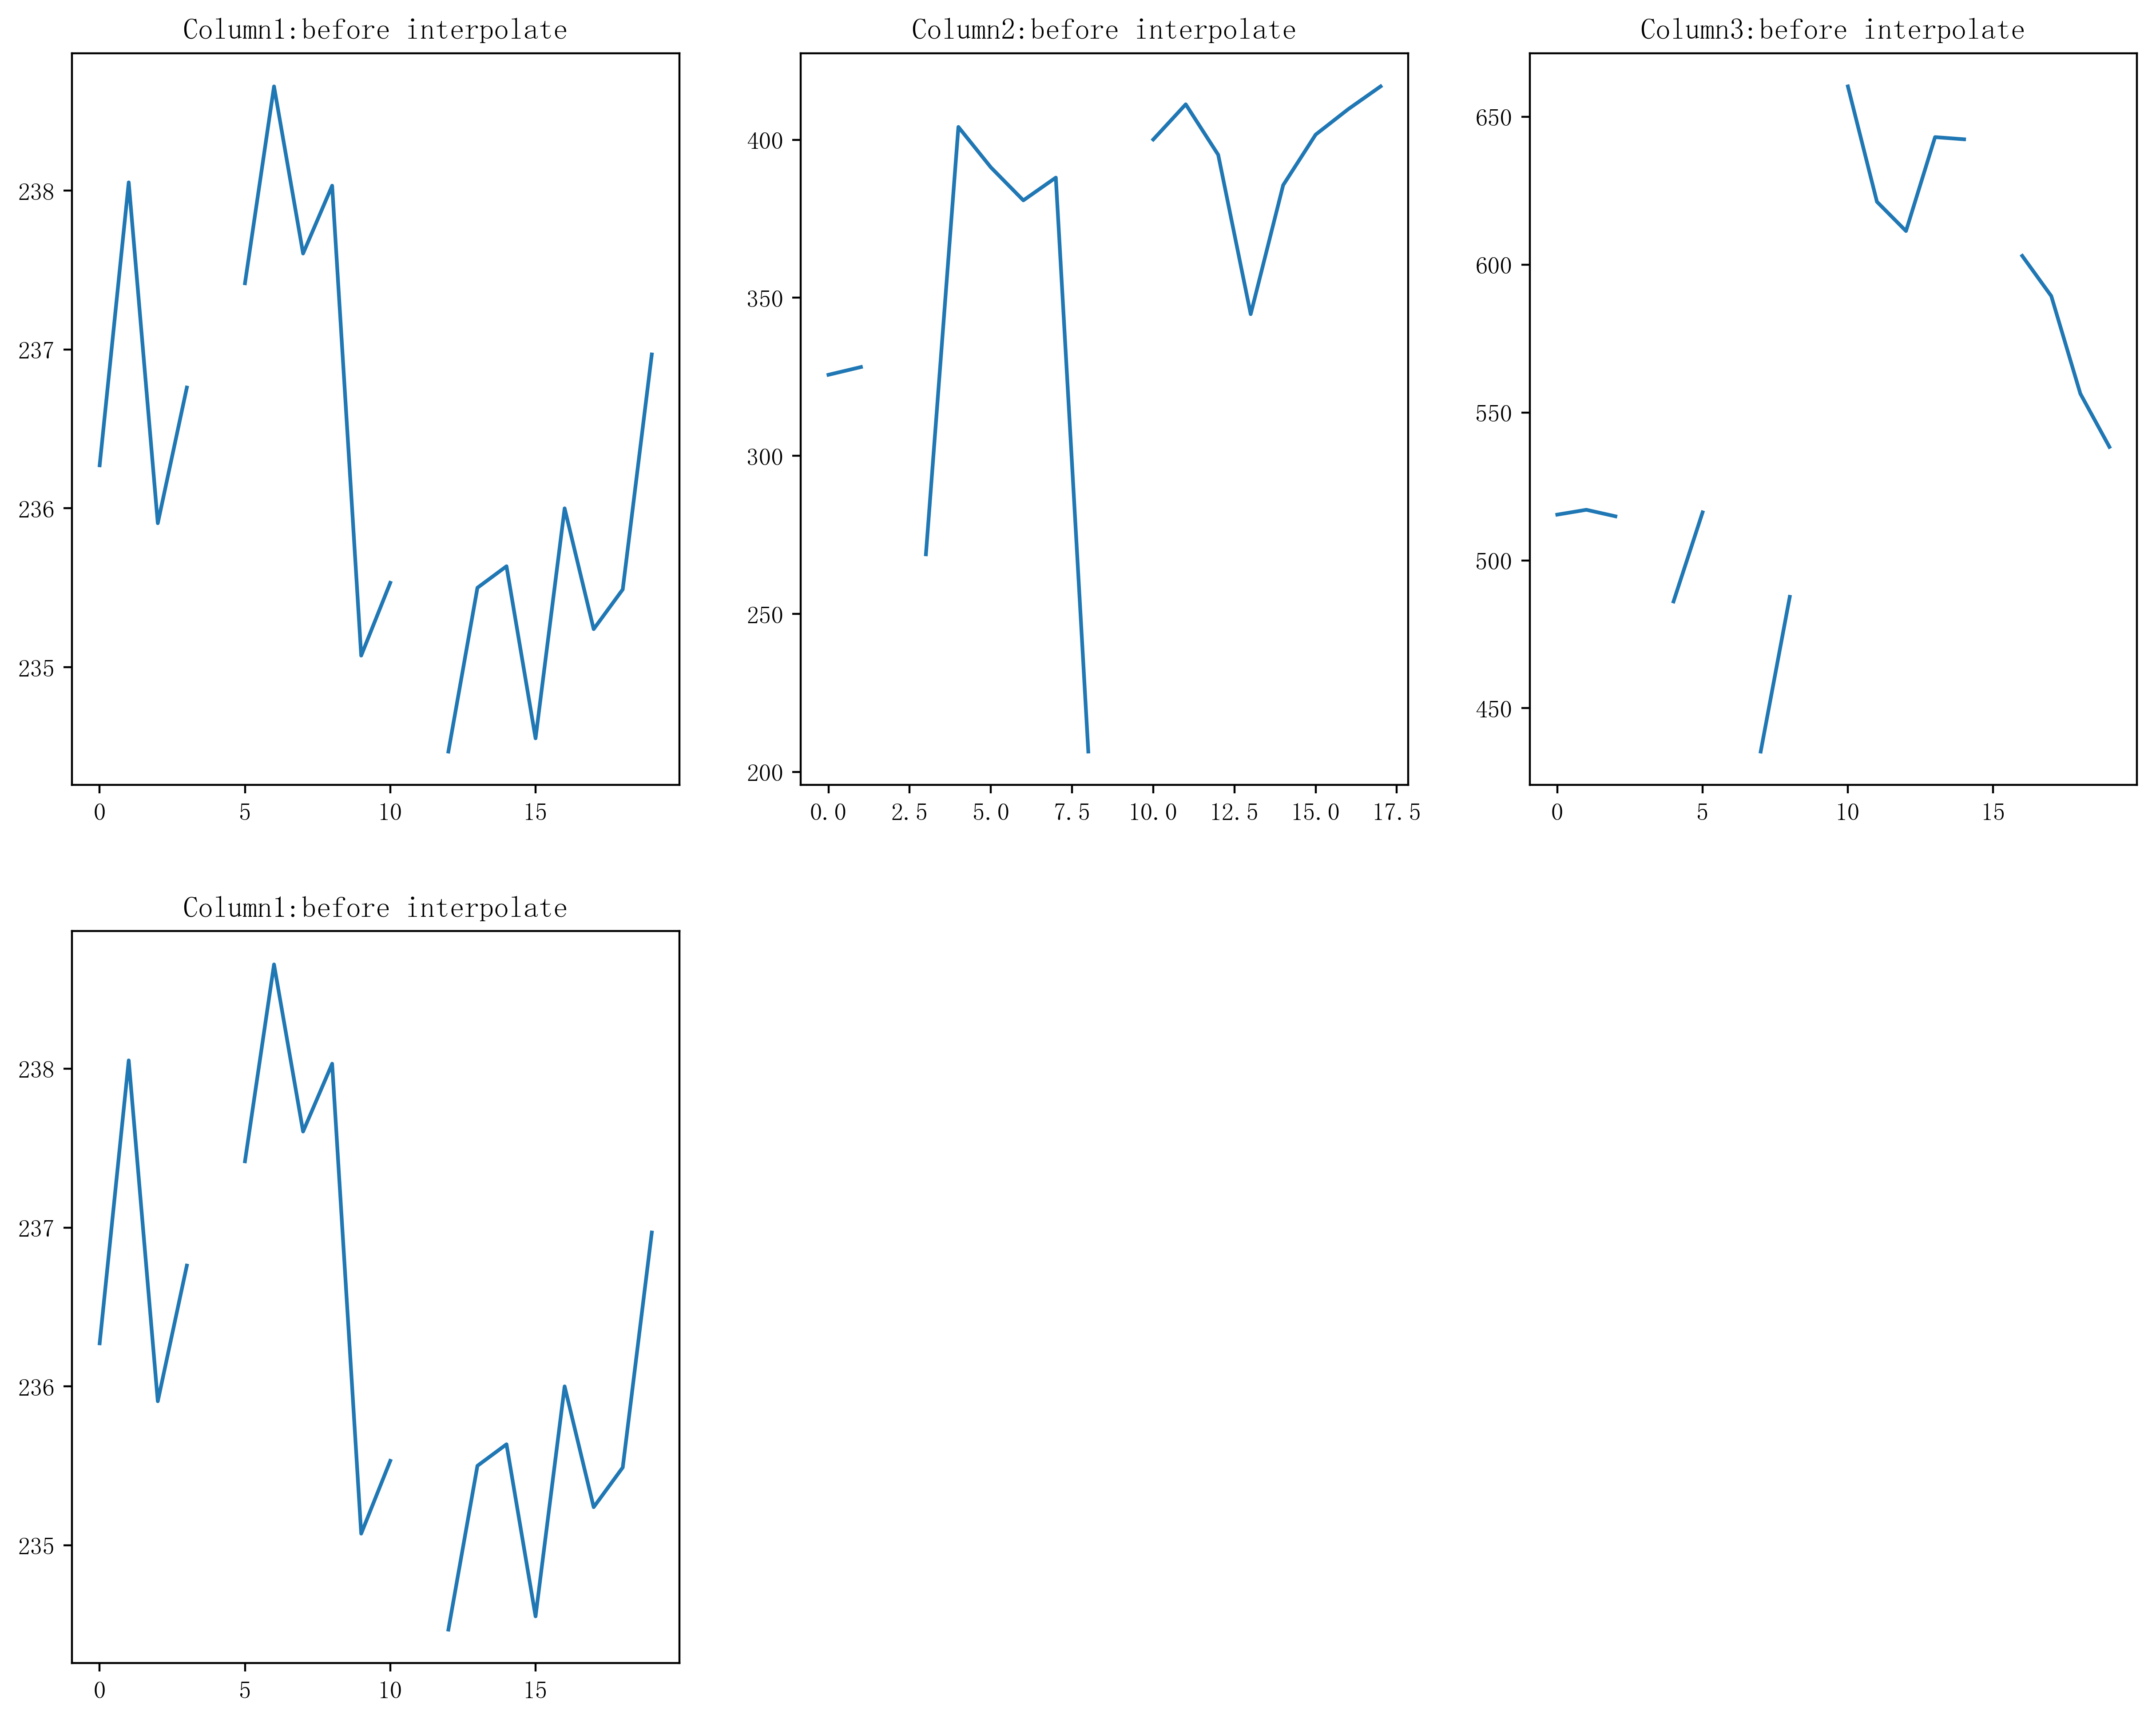

(20, 1)


In [79]:
#missing
y1 = missing.iloc[:,[0]]
y2 = missing.iloc[:,[1]]
y3 = missing.iloc[:,[2]]
x = [i+1 for i in missing.index.tolist()]

import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

p1 = plt.figure(figsize=(15,12),dpi = 400)
ax1 = p1.add_subplot(2,3,1)
plt.title('Column1:before interpolate')
plt.plot(y1)
ax2 = p1.add_subplot(2,3,2)
plt.title('Column2:before interpolate')
plt.plot(y2)
ax3 = p1.add_subplot(2,3,3)
plt.title('Column3:before interpolate')
plt.plot(y3)
ax4 = p1.add_subplot(2,3,4)
plt.title('Column1:before interpolate')
#以长度的等差数列作x，在缺失位置前后作参数插值,在表达缺失位置的list内用for循环遍历获取坐标，实现插入

plt.plot(y1)
plt.show()
print(y1.shape)

## 2.合并线损，用电量趋势和线路告警数据

### （1）读取ele_loss.csv, alarm.csv

In [10]:
import pandas as pd
import numpy as np
loss = pd.read_csv('ele_loss.csv',encoding='gbk')
alarm = pd.read_csv('alarm.csv',encoding='gbk')

### （2）查看二者形状

In [ ]:
print(loss.shape)
print(alarm.shape)

### （3）ID、date两者作为主键进行内链接

In [ ]:
merge_table = pd.merge(alarm,loss)

### （4）查看合并后数据

In [ ]:
merge_table

### Whole：

In [41]:
import pandas as pd
import numpy as np
loss = pd.read_csv('ele_loss.csv',encoding='gbk')
alarm = pd.read_csv('alarm.csv',encoding='gbk')

print(loss.shape)
print(alarm.shape)

merge_table = pd.merge(alarm,loss)

merge_table

(49, 4)
(25, 3)


ID       date    alarm    ele      loss
0  21261001   2010/9/3    电流不平衡  858.0  0.151048
1  21261001   2010/9/6  C相电流过负荷  883.5  0.162778
2  21261001  2010/9/16  C相电流过负荷  915.5  0.162028
3  21261001  2010/9/16  C相电流过负荷  915.5  0.162028
4  21261001  2010/9/17  A相电流过负荷  961.0  0.166650
5  21261001  2010/9/17    电流不平衡  961.0  0.166650

## 3.标准化建模专家样本数据

### （1）读取model.csv

In [43]:
import pandas as pd
import numpy as np
model = pd.read_excel('model.xls',encoding='gbk')

### （2）定义标准差标准化函数

### （3）使用该函数分别对三列数据标准化

### （4）查看标准化后数据